In [ ]:
# TO RUN IT: CHANGE MY PATH
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'C:\Users\utente\Documents\GitHub\Project1_ML'
sys.path.insert(0,my_path + r'\code\COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *
from extend_features import *

# Build dataset

### Load raw data

In [ ]:
from proj1_helpers import load_csv_data 
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

### Handle outliers and Labels

In [3]:
from outliers import handle_outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')

y[np.where(y==-1)]=0

-999 are replaced by the mean value of the feature


### Features generation and Standardization

In [4]:
# get feature names 
names = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])
log = False
degree = 3

#Features extension
all_candidates, feat_names = extend_features(X0, names, degree, log)

---------------------------
Features have been set to the power(s): [1, 2, 3]
16 Features of the momentum have been added
Data have been standardized.
---------------------------


In [6]:
print(all_candidates.shape)
print(len(feat_names))
print(*feat_names, sep='\n')

(250000, 106)
106
(0, 'DER_mass_MMC_power_1')
(1, 'DER_mass_MMC_power_2')
(2, 'DER_mass_MMC_power_3')
(3, 'DER_mass_transverse_met_lep_power_1')
(4, 'DER_mass_transverse_met_lep_power_2')
(5, 'DER_mass_transverse_met_lep_power_3')
(6, 'DER_mass_vis_power_1')
(7, 'DER_mass_vis_power_2')
(8, 'DER_mass_vis_power_3')
(9, 'DER_pt_h_power_1')
(10, 'DER_pt_h_power_2')
(11, 'DER_pt_h_power_3')
(12, 'DER_deltaeta_jet_jet_power_1')
(13, 'DER_deltaeta_jet_jet_power_2')
(14, 'DER_deltaeta_jet_jet_power_3')
(15, 'DER_mass_jet_jet_power_1')
(16, 'DER_mass_jet_jet_power_2')
(17, 'DER_mass_jet_jet_power_3')
(18, 'DER_prodeta_jet_jet_power_1')
(19, 'DER_prodeta_jet_jet_power_2')
(20, 'DER_prodeta_jet_jet_power_3')
(21, 'DER_deltar_tau_lep_power_1')
(22, 'DER_deltar_tau_lep_power_2')
(23, 'DER_deltar_tau_lep_power_3')
(24, 'DER_pt_tot_power_1')
(25, 'DER_pt_tot_power_2')
(26, 'DER_pt_tot_power_3')
(27, 'DER_sum_pt_power_1')
(28, 'DER_sum_pt_power_2')
(29, 'DER_sum_pt_power_3')
(30, 'DER_pt_ratio_lep_tau

In [ ]:
# model parameters
model = dict()
model['method'] = 'rr' 
model['loss'] = 'loglikelihood'
model['lambda_'] = 0

# model hyperparameter
model['gamma'] = 0

model['debug_mode'] = 1

# R2 type
R2_method = 'McFadden' # 'loss', 'Tjur' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 1
model['k_fold'] = 10

In [ ]:
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

In [ ]:
import winsound
frequency = 2000  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [ ]:
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

In [7]:
phi = all_candidates 
np.shape(phi)

(250000, 106)

tested lambda_:  [  1.00000000e-09   1.29154967e-08   1.66810054e-07   2.15443469e-06
   2.78255940e-05   3.59381366e-04   4.64158883e-03   5.99484250e-02
   7.74263683e-01   1.00000000e+01] 

------------------------------------------ cross validation with lambda_ =  1e-09
------------------------------------------ cross validation with lambda_ =  1.29154966501e-08
------------------------------------------ cross validation with lambda_ =  1.6681005372e-07
------------------------------------------ cross validation with lambda_ =  2.15443469003e-06
------------------------------------------ cross validation with lambda_ =  2.78255940221e-05
------------------------------------------ cross validation with lambda_ =  0.00035938136638
------------------------------------------ cross validation with lambda_ =  0.00464158883361
------------------------------------------ cross validation with lambda_ =  0.0599484250319
------------------------------------------ cross validation with lambda_

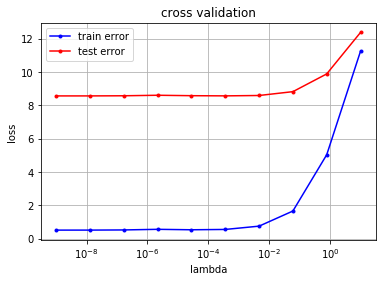

In [10]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['k_fold'] = 10

# optimization parameters
lambda_min = -9
lambda_max = 1
lambda_steps = 10

# optimize lambda_
w_opt, loss_tr, loss_te, lambda_opt, success_rate = optimize_lambda(y, phi, lambda_min, lambda_max, lambda_steps, arg_rr, debug_mode=1)


In [11]:
print(success_rate)

0.689172


In [ ]:
wrr, loss = ridge_regression(y, phi, 4.548777947e-05)

Y = predict_labels(wrr, phi)


In [ ]:
pos = 0
neg = 0
for i in range (len(y)):
    if Y[i] == y[i]:
        pos += 1
    else:
        neg += 1
print(pos)
print(neg)

success_rate = pos/(pos+neg)
print(success_rate)

In [ ]:
from extend_features import *

nope, test_data, ids = load_csv_data(my_path + r'\data\test.csv', sub_sample=False)

feature_names= list(np.genfromtxt(my_path + r'\data\test.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

input_data, Y = handle_outliers(test_data,nope,-999,'median')

X_test, _ = extend_features(test_data, feature_names, degree, is_add_log = True)

print("Data loaded! Shape: ")
print(np.shape(X_test))

In [ ]:
X_test = X_test[:, idx_features]

print(np.shape(X_test))

y_pred = predict_labels(wrr,X_test)


In [ ]:
y_pred[np.where(y_pred==0)] = -1

In [ ]:
create_csv_submission(ids, y_pred, "rov_sub")